In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
from datetime import datetime
data = pd.read_csv('bus.csv')

In [3]:
def format_time(time):
    return datetime.fromisoformat(time[:-1])

In [4]:
def subtract_time(observed, scheduled):
    return (observed - scheduled).total_seconds() / 60

In [5]:
#missing data
missing = data.id.count() - data.observed_visit_time.count() 

#dropping rows where observed_visit_time data is missing
observed_times = data.dropna(subset = ["observed_visit_time", "scheduled_visit_time"]) 
observed_times_copy = observed_times.copy()
observed_times_copy['observed_visit_time'] = observed_times_copy['observed_visit_time'].map(format_time)
observed_times_copy['scheduled_visit_time'] = observed_times_copy['scheduled_visit_time'].map(format_time)

observed_times_formatted = observed_times_copy['observed_visit_time']
observed_times_formatted = observed_times_formatted.reset_index(drop=True)
#print(observed_times_formatted)

scheduled_times_formatted = observed_times_copy['scheduled_visit_time']
scheduled_times_formatted = scheduled_times_formatted.reset_index(drop=True)
#print(scheduled_times_formatted )

difference_times_total = np.empty(0)
difference_times_weekday = np.empty(0)
difference_times_weekend = np.empty(0)
rush_hours = np.empty(0)
normal_hours = np.empty(0)
threshold = 5

for number in range(0, observed_times_formatted.shape[0] - 1):
    time_difference = subtract_time(observed_times_formatted[number], scheduled_times_formatted[number])
    if (scheduled_times_formatted[number].weekday() == 5 or scheduled_times_formatted[number].weekday() == 6):
        difference_times_weekend = np.append(difference_times_weekend, time_difference)
    else: 
        difference_times_weekday = np.append(difference_times_weekday, time_difference)
    difference_times_total = np.append(difference_times_total, time_difference)
    
    formatted_time = scheduled_times_formatted[number]
    just_time = formatted_time.time()
    hour = just_time.hour
    if(time_difference > threshold):
        rush_hours = np.append(rush_hours, hour)
    else:
        normal_hours = np.append(normal_hours, hour)


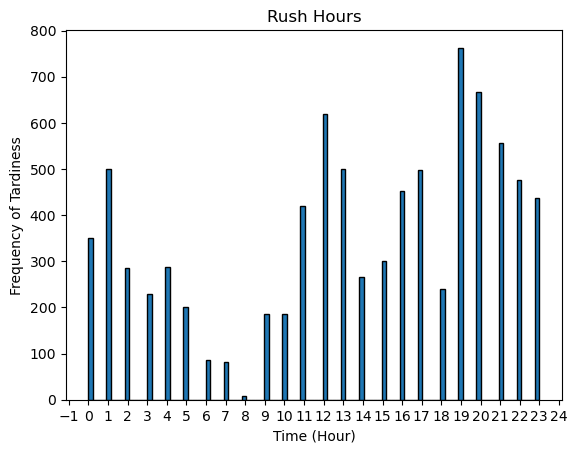

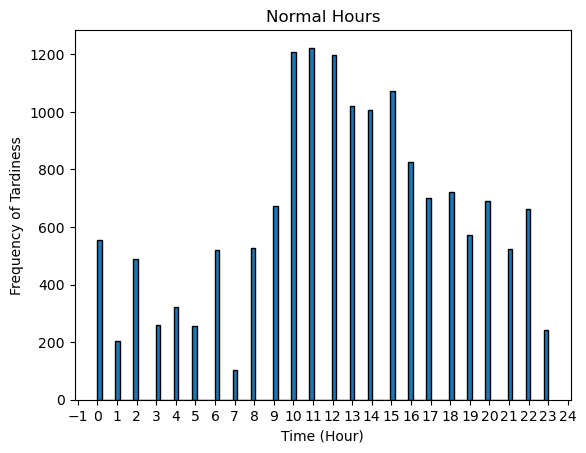

In [6]:
# Create a histogram plot
plt.hist(rush_hours, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Rush Hours')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency of Tardiness')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

# Display the plot
plt.show()


plt.hist(normal_hours, bins=100, edgecolor='black')
plt.title('Normal Hours')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency of Tardiness')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()


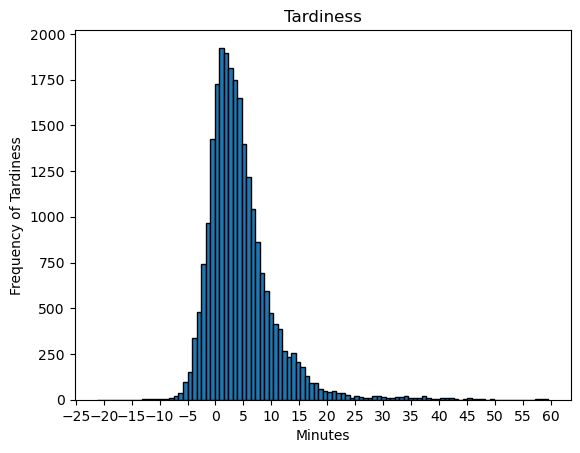

4.3801552375437725
0.6577666666666667
6.651983333333334
6.013859995057068


In [8]:
# Create a histogram plot
plt.hist(difference_times_total, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Display the plot
plt.show()

print(difference_times_total.mean())
print(np.quantile(difference_times_total, 0.25))
print(np.quantile(difference_times_total, 0.75))
print(np.std(difference_times_total))



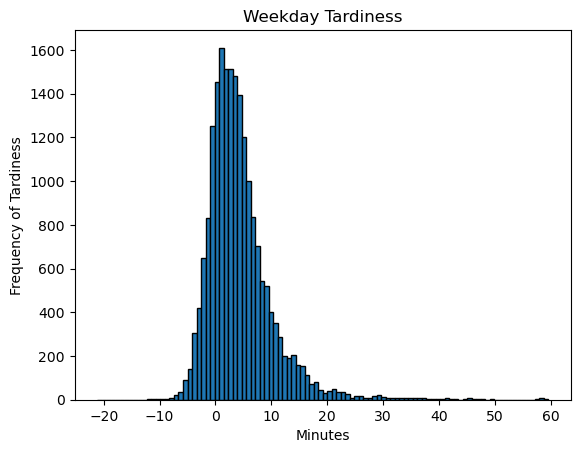

4.276248215403367
0.5681916666666667
6.5301125


In [9]:
# Create a histogram plot
plt.hist(difference_times_weekday, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Weekday Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')

# Display the plot
plt.show()

print(difference_times_weekday.mean())
print(np.quantile(difference_times_weekday, 0.25))
print(np.quantile(difference_times_weekday, 0.75))

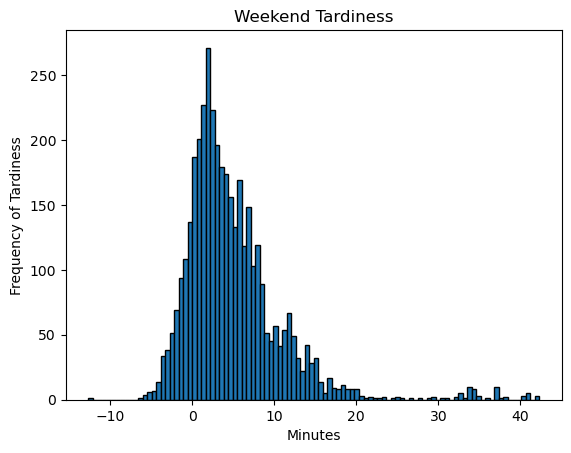

4.91387866751269
1.1464083333333335
7.182654166666667


In [10]:
# Create a histogram plot
plt.hist(difference_times_weekend, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Weekend Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')

# Display the plot
plt.show()

print(difference_times_weekend.mean())
print(np.quantile(difference_times_weekend, 0.25))
print(np.quantile(difference_times_weekend, 0.75))

In [16]:

weekday_sum = 0
weekend_sum = 0
time_of_day = np.empty(0)

missing_data = data.copy()
observed_visit_times = missing_data['observed_visit_time']
scheduled_visit_times = missing_data['scheduled_visit_time']
missing_data_times = missing_data['scheduled_visit_time'].map(format_time)
for number in range(0, missing_data.shape[0] - 1):
    if (observed_visit_times[number] != observed_visit_times[number]):   
        if (missing_data_times[number].weekday() == 6 or missing_data_times[number].weekday() == 5):
            formatted_time = format_time(scheduled_visit_times[number])
            time = formatted_time.time()
            hour = time.hour
            time_of_day = np.append(time_of_day, hour)
            weekend_sum += 1
        else:
            formatted_time = format_time(scheduled_visit_times[number])
            time = formatted_time.time()
            hour = time.hour
            time_of_day = np.append(time_of_day, hour)
            weekday_sum += 1
print(missing)

9588


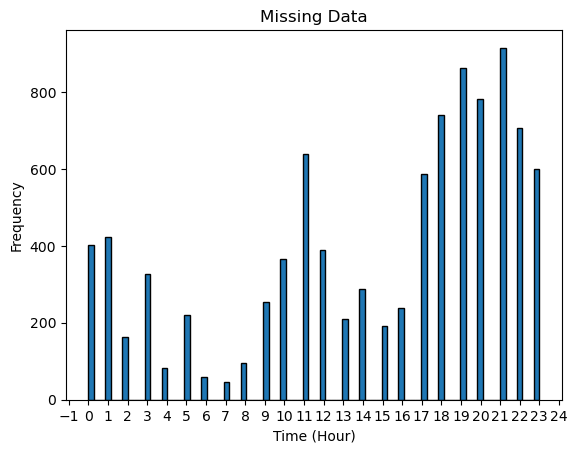

In [12]:
# Create a histogram plot
plt.hist(time_of_day, bins=80, edgecolor='black')

# Set plot title and labels
plt.title('Missing Data')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

# Display the plot
plt.show()

In [13]:
arrivals = data.copy() #copy of entire data set

stop_names = arrivals['stop_name'] #just the stop_name column
unique_stop_names = stop_names.unique() #getting all the unique stop names

arrival_times = arrivals['observed_visit_time'] #just the observed_visit_time column

keys = np.empty(0)
for stop in unique_stop_names:
    keys = np.append(keys, stop)

stop_times = {key: [] for key in keys}


In [24]:

#loop through each element in the observed_time column and find the difference in time if observed_time exists for both
for stop in range(0, len(unique_stop_names) - 1):
    for number in range(0, len(arrival_times) - 1):
        if stop_names[number] == unique_stop_names[stop]:
            if arrival_times[number] == arrival_times[number]:
                #can have dictionary with key being stop_name and value being array of all the observed_times with a "None" value for missing
                #basically add all these times to the dictionary
                stop_times[unique_stop_names[stop]].append(arrival_times[number])
            else: 
                stop_times[unique_stop_names[stop]].append("None")
print(len(stop_times['LUTHERVILLE LIGHT RAIL STATION BAY 1']))
#initialize dictionary of all the difference in times with values being arrays that contain interarrival times

interarrival_times = {key: [] for key in keys}

#then loop through each array in the dictionary to find the difference in times using similar logic to this:
for item in stop_times:
    for number in range(0, len(stop_times[item]) - 2):
        if (stop_times[item][number] == "None" or stop_times[item][number + 1] == "None"):
            continue
        else:
            first = format_time(stop_times[item][number])
            second = format_time(stop_times[item][number + 1])
            difference_in_time = subtract_time(second, first)
            interarrival_times[item].append(difference_in_time)

#dicitonary/map of all the means and other data
interarrival_stats = {key: [] for key in keys}


#for item in interarrival_stats:



69308


TypeError: 'float' object is not subscriptable